In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET_PATH = '../data/acute_coronary_syndrome_db.xlsx'
df = pd.read_excel(DATASET_PATH, sheet_name=0, usecols=range(0, 74))

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     1818 non-null   int64  
 1   SEX0                                     1818 non-null   int64  
 2   HTA                                      1818 non-null   int64  
 3   DBT                                      1818 non-null   int64  
 4   DLP                                      1818 non-null   int64  
 5   TABAQ                                    1818 non-null   int64  
 6   ANTEC IAM / Angina inestable             1818 non-null   int64  
 7   ANTEC BY PASS                            1818 non-null   int64  
 8   ANTEC ATC                                1818 non-null   int64  
 9   ANTEC ACE                                1818 non-null   int64  
 10  ANTEC INS RENAL                          1818 no

Vemos que algunas columnas tienen como tipo de dato a `object`. Seleccionamos esas columnas para investigar que contienen:

In [3]:
# Seleccionamos las columnas donde el tipo de dato es object
object_columns = df.select_dtypes(include=['object']).columns

In [4]:
for column in object_columns:
    print(f"Columna: {column}")
    print(f"Valores: {df[column].unique()}")

Columna: ALTURA cm
Valores: [155 165 172 162 175 160 178 182 168 157 169 180 170 167 173 179 187 159
 156 171 183 158 176 150 177 186 174 163 161 185 166 164 154 55 181 82 135
 193 147 nan 153 184 190 194 ' ' 142 189 151 149 152 148 199 200 144 197
 146 191 196 188 108 192 195 73 70 80 75 130]
Columna: TROPONINA MAX
Valores: [0.2 0.05 0 0.08 4.3 1.93 0.1 1.35 0.19 0.09 0.246 0.25 1.5 0.052 1.7 0.01
 2.09 1.1 0.075 0.15 1.9 0.049 0.126 3.87 0.7 2.75 0.3 2.3 1.47 0.428
 0.046 11 0.63 2 0.13 1.2 0.011 0.058 0.027 10 0.11 7 9 0.5 0.9 0.047 0.87
 0.55 0.65 0.52 3.1 5 7.3 0.012 0.8 1 1.8 12.6 1.6 0.037 '0.086' '0.04'
 '0.019' 1.19 0.018 6.7 2.4 6.9 0.18 0.26 0.33 1.45 '0.68' '1.9' '0.01'
 0.015 0.6 12 13 '0.58' '0.3' '0.29' 1.3 0.48 '0.12' 16 0.026 0.32 0.07
 '0.5' 2.33 '0.011' 0.06 0.43 '<0,01' 5.2 0.45 0.16 0.12 5.8 0.4 0.03
 0.022 1.37 0.22 '0.88' 0.67 0.04 0.14 0.02 '2.45' 0.157 0.147 0.036 0.57
 2.69 4.5 3.79 0.75 0.854 3.2 0.038 0.165 0.29 0.134 0.685 '6.09' 0.043
 0.016 '5.4' 0.23 6.5

In [5]:
# Int columns
int_columns = ['ALTURA cm', 'GLUCEMIA INGR', 'GB', 'BB', 'INOTROPICOS', 'FUNCION VENTRICULAR IZQ', 'IAM HOSP(SI INTERNO POR ANGINA) O REIAM']
# Float columns
float_columns = ['TROPONINA MAX', 'CREAT']

Obtenemos los valores que no se corresponden con numeros y los mostramos

In [6]:
from datetime import datetime
# Función para verificar si un valor no es numérico
def is_not_numeric(value):
    if isinstance(value, datetime):
        return True
    try:
        float(value)
        return False
    except ValueError:
        return True
    except TypeError:
        return True

# Diccionario para almacenar los valores no numéricos de cada columna
non_numeric_values = {}

# Iteramos sobre las columnas de tipo object
for col in object_columns:
    non_numeric_values[col] = df[col][df[col].apply(is_not_numeric)].tolist()

# Imprimimos los valores no numéricos por columna
for col, values in non_numeric_values.items():
    print(f"Columna {col}: {values}")

Columna ALTURA cm: [' ']
Columna TROPONINA MAX: ['<0,01', '<0,01', '<0,01', '<3', '-', '-']
Columna CREAT: [' ', '1,03']
Columna GLUCEMIA INGR: [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
Columna GB: [' ', ' ', ' ', ' ', datetime.datetime(2024, 3, 13, 0, 0), datetime.datetime(2024, 3, 16, 0, 0), datetime.datetime(2024, 8, 7, 0, 0), datetime.datetime(2024, 12, 7, 0, 0), datetime.datetime(2024, 5, 19, 0, 0), datetime.datetime(2024, 4, 11, 0, 0), datetime.datetime(2024, 9, 8, 0, 0), ' ', ' ', ' ', ' ', ' ', ' ', datetime.datetime(2024, 6, 8, 0, 0), ' ', ' ', datetime.datetime(2024, 4, 5, 0, 0), datetime.datetime(2024, 3, 13, 0, 0), datetime.datetime(1943, 10, 21, 0, 0), datetime.datetime(1921, 5, 9, 0, 0), datetime.datetime(2094, 12, 7, 0, 0), datetime.datetime(1953, 5, 21, 0, 0), datetime.datetime(2024, 

Vemos que hay valores string vacios, strings que representan una expresion numerica `<0,01`, guiones, texto aclaratorio, etc.
Tenemos que limpiar todos los simbolos y espacios en blanco. Tambien transformar los textos en valores que tengan sentido para esa feature. 

In [7]:
df_copy = df.copy()

for col in object_columns:
    # Remover los datetime
    df_copy[col] = df_copy[col].apply(lambda x: '' if isinstance(x, datetime) else x)
    # Convertir la columna a string
    df_copy[col] = df_copy[col].astype(str)
    # Aplicar trim (strip) para eliminar espacios en blanco
    df_copy[col] = df_copy[col].str.strip()
    # Reemplazar comas por puntos
    df_copy[col] = df_copy[col].str.replace(',', '.')
    # Reemplazar todos los caracteres que no sean números (0-9) ni puntos (.) con una cadena vacía ('')
    df_copy[col] = df_copy[col].str.replace(r'[^0-9.]', '', regex=True)
    # Reemplazar las cadenas vacías con NaN
    df_copy[col] = df_copy[col].replace('', np.nan)

Finalmente convertimos las columnas a su formato correspondiente:

In [8]:
for col in int_columns:
    df_copy[col] = df_copy[col].astype('Int64')
    
for col in float_columns:
    df_copy[col] = df_copy[col].astype(float)

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     1818 non-null   int64  
 1   SEX0                                     1818 non-null   int64  
 2   HTA                                      1818 non-null   int64  
 3   DBT                                      1818 non-null   int64  
 4   DLP                                      1818 non-null   int64  
 5   TABAQ                                    1818 non-null   int64  
 6   ANTEC IAM / Angina inestable             1818 non-null   int64  
 7   ANTEC BY PASS                            1818 non-null   int64  
 8   ANTEC ATC                                1818 non-null   int64  
 9   ANTEC ACE                                1818 non-null   int64  
 10  ANTEC INS RENAL                          1818 no

In [10]:
df_copy.describe()

,EDAD,SEX0,HTA,DBT,DLP,TABAQ,ANTEC IAM / Angina inestable,ANTEC BY PASS,ANTEC ATC,ANTEC ACE,...,TROMBOL,CRM,MUERTE HOSP,IAM HOSP(SI INTERNO POR ANGINA) O REIAM,APIAM,Peor KILLIP,ANGINA REFRACT o RECURR,ACV/TIA,SANGRADO MAYOR*,I RENAL AGUDA
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,...,1817.000000,1815.000000,1815.000000,1815.0,1815.00000,1818.000000,1815.000000,1814.000000,1814.000000,1816.000000
mean,66.449945,0.704620,0.663916,0.196370,0.547305,0.350385,0.265127,0.072607,0.186469,0.039054,...,0.008255,0.080441,0.035262,0.014876,0.01157,1.073707,0.034711,0.002756,0.015436,0.055617
std,12.313550,0.456339,0.472498,0.397361,0.497894,0.477222,0.441522,0.259562,0.389592,0.193777,...,0.090508,0.272049,0.184491,0.12109,0.10697,0.403700,0.183097,0.052443,0.123311,0.229243
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.00000,4.000000,1.000000,1.000000,1.000000,1.000000


Buscamos las columnas que son categoricas y solo toman dos valores posibles: `1` o `0`.

In [11]:
# Función para encontrar columnas que solo tienen valores 0 y 1
def find_binary_columns(df):
    binary_columns = [col for col in df.columns if df[col].isin([0, 1]).all()]
    return binary_columns

# Aplicamos la función al DataFrame
binary_columns = find_binary_columns(df_copy)

# Mostramos las columnas que solo tienen valores 0 y 1
print(binary_columns)

['SEX0', 'HTA', 'DBT', 'DLP', 'TABAQ', 'ANTEC IAM / Angina inestable', 'ANTEC BY PASS', 'ANTEC ATC', 'ANTEC ACE', 'ANTEC INS RENAL', 'ACV TIA PREV', 'EPOC', 'CLAUD ITTE', 'BB PREV', ' IECA/AT2  PREV', 'B CA PREV', 'AAS PREV', 'HIPOGLUCEMIANTES', 'DIURETICOS', 'INSULINA', 'ECG INFRA ST', 'ECG SUPRA ST', 'ECG INV T', 'BRD', 'ECG MCP', 'TnT Ultrasensible', 'Elevacion troponina T', 'AAS', 'IECA', 'Clopi - prasu - tica', 'HEP sc o iv', 'IIb IIIa', 'ESTATINAS', 'HIPOGL SULFAN', 'PRUEBA FUNC.', 'CCG', 'ATC PRIMARIA', 'ATC INTRAHOSP']


Las transformamos de columnas boolean de la siguiente manera:

In [12]:
for col in binary_columns:
    df_copy[col] = df_copy[col].astype(bool)

In [13]:
df_copy.head()

,EDAD,SEX0,HTA,DBT,DLP,TABAQ,ANTEC IAM / Angina inestable,ANTEC BY PASS,ANTEC ATC,ANTEC ACE,...,TROMBOL,CRM,MUERTE HOSP,IAM HOSP(SI INTERNO POR ANGINA) O REIAM,APIAM,Peor KILLIP,ANGINA REFRACT o RECURR,ACV/TIA,SANGRADO MAYOR*,I RENAL AGUDA
0,76,False,True,True,True,False,False,True,True,False,...,0.0,1.0,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,94,False,True,True,True,False,False,False,True,False,...,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0
2,66,True,False,False,True,True,True,False,False,False,...,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0
3,56,True,True,False,True,True,True,True,False,False,...,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0
4,41,True,True,True,True,True,False,False,False,False,...,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0


Renombramos la columna `SEX0` para que su nombre tenga sentido (Hombre: `True`; Mujer: `False`)

In [14]:
df_copy['Hombre'] = df_copy['SEX0']
df_copy = df_copy.drop(['SEX0'], axis=1)

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     1818 non-null   int64  
 1   HTA                                      1818 non-null   bool   
 2   DBT                                      1818 non-null   bool   
 3   DLP                                      1818 non-null   bool   
 4   TABAQ                                    1818 non-null   bool   
 5   ANTEC IAM / Angina inestable             1818 non-null   bool   
 6   ANTEC BY PASS                            1818 non-null   bool   
 7   ANTEC ATC                                1818 non-null   bool   
 8   ANTEC ACE                                1818 non-null   bool   
 9   ANTEC INS RENAL                          1818 non-null   bool   
 10  ACV TIA PREV                             1818 no

Ahora bucamos las columnas con valores enteros ya que pueden ser columnas categoricas codificadas con numeros:

In [16]:
# Seleccionamos las columnas que contienen valores enteros
integer_columns = df_copy.select_dtypes(include='int').columns

# Mostramos los nombres de las columnas con valores enteros
print(integer_columns)

Index(['EDAD', 'ALTURA cm', 'GLUCEMIA INGR', 'GB', 'KILLIP Ingreso', 'BB',
       'INOTROPICOS', 'FUNCION VENTRICULAR IZQ',
       'IAM HOSP(SI INTERNO POR ANGINA) O REIAM', 'Peor KILLIP'],
      dtype='object')


No consideramos la columna `EDAD` ya que siempre es una columna entera. Vemos los valores que toman las demas columnas:

In [17]:
for col in integer_columns:
    print(f"{col.title()}: {df_copy[col].unique()}")

Edad: [ 76  94  66  56  41  61  86  58  59  88  79  82  67  53  46  42  63  73
  69  60  62  44  78  77  68  49  87  80  74  83  37  64  55  54  70  92
  85  51  65  72  57  90  91  75  47  71  50  45  52  81  96  48  39  38
  89  31  84  29  40  32  35  95  43 100  33  93  34  25]
Altura Cm: <IntegerArray>
[ 155,  165,  172,  162,  175,  160,  178,  182,  168,  157,  169,  180,  170,
  167,  173,  179,  187,  159,  156,  171,  183,  158,  176,  150,  177,  186,
  174,  163,  161,  185,  166,  164,  154,   55,  181,   82,  135,  193,  147,
 <NA>,  153,  184,  190,  194,  142,  189,  151,  149,  152,  148,  199,  200,
  144,  197,  146,  191,  196,  188,  108,  192,  195,   73,   70,   80,   75,
  130]
Length: 66, dtype: Int64
Glucemia Ingr: <IntegerArray>
[160, 131,  98, 106, 110, 146,  97,  96, 137, 107,
 ...
 272, 198, 248, 279, 282, 391,  63, 679, 276, 315]
Length: 222, dtype: Int64
Gb: <IntegerArray>
[ 8920, 10340,  6780,  5830, 14990,  7500, 10800,  7340, 11100, 11040,
 ...
  5920

Podemos ver que nos las features categoricas no-binarias son `Killip Ingreso`, `Funcion Ventricular Izq` y `Peor Killip`

In [28]:
print(f"'KILLIP Ingreso': {df_copy['KILLIP Ingreso'].unique()}")
print(f"'Peor KILLIP': {df_copy['Peor KILLIP'].unique()}")

'KILLIP Ingreso': [1 2 4 3]
'Peor KILLIP': [1 2 3 4 0]


In [8]:
df.head()

,EDAD,SEX0,HTA,DBT,DLP,TABAQ,ANTEC IAM / Angina inestable,ANTEC BY PASS,ANTEC ATC,ANTEC ACE,...,TROMBOL,CRM,MUERTE HOSP,IAM HOSP(SI INTERNO POR ANGINA) O REIAM,APIAM,Peor KILLIP,ANGINA REFRACT o RECURR,ACV/TIA,SANGRADO MAYOR*,I RENAL AGUDA
0,76,0,1,1,1,0,0,1,1,0,...,0.0,1.0,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,94,0,1,1,1,0,0,0,1,0,...,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0
2,66,1,0,0,1,1,1,0,0,0,...,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0
3,56,1,1,0,1,1,1,1,0,0,...,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0
4,41,1,1,1,1,1,0,0,0,0,...,0.0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0


In [9]:
df.describe()

,EDAD,SEX0,HTA,DBT,DLP,TABAQ,ANTEC IAM / Angina inestable,ANTEC BY PASS,ANTEC ATC,ANTEC ACE,...,ATC INTRAHOSP,TROMBOL,CRM,MUERTE HOSP,APIAM,Peor KILLIP,ANGINA REFRACT o RECURR,ACV/TIA,SANGRADO MAYOR*,I RENAL AGUDA
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,...,1818.000000,1817.000000,1815.000000,1815.000000,1815.00000,1818.000000,1815.000000,1814.000000,1814.000000,1816.000000
mean,66.449945,0.704620,0.663916,0.196370,0.547305,0.350385,0.265127,0.072607,0.186469,0.039054,...,0.389989,0.008255,0.080441,0.035262,0.01157,1.073707,0.034711,0.002756,0.015436,0.055617
std,12.313550,0.456339,0.472498,0.397361,0.497894,0.477222,0.441522,0.259562,0.389592,0.193777,...,0.487882,0.090508,0.272049,0.184491,0.10697,0.403700,0.183097,0.052443,0.123311,0.229243
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,4.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
# Asumptions
NUMERICAL_FEATURES = ['PESO Kg', 'ALTURA cm', 'TROPONINA MAX', 'CREAT', 'GLUCEMIA INGR', 'GB', 'TAS INGRESO', 'FC INGRESO', 'NUMERO VASOS']
NUMERICAL_CONTINOUS = NUMERICAL_FEATURES
CATEGORY_FEATURES = ['SEX0', 'HTA', 'DBT', 'DLP', 'TABAQ', 'ANTEC IAM / Angina inestable', 'ANTEC BY PASS', 'ANTEC ATC', 'ANTEC ACE', 'ANTEC INS RENAL', 'ACV TIA PREV', 'EPOC', 'CLAUD ITTE', 'BB PREV', ' IECA/AT2  PREV', 'B CA PREV', 'AAS PREV', 'HIPOGLUCEMIANTES', 'DIURETICOS', 'INSULINA', 'ECG INFRA ST', 'ECG SUPRA ST', 'ECG INV T', 'BRI', 'BRD', 'ECG MCP', 'ECG FA', 'tropst', 'TnT Ultrasensible', 'Elevacion troponina T', 'KILLIP Ingreso', 'AAS', 'BB', 'IECA', 'AT2', 'Clopi - prasu - tica', 'HEP sc o iv', 'IIb IIIa', 'B CA', 'ESTATINAS', 'HIPOGLUC METFORM', 'HIPOGL SULFAN', 'HIPOGL GLITAZ', 'INSULINA', 'INS + HIPOGL', 'INOTROPICOS', 'FUNCION VENTRICULAR IZQ', 'DIAGNOSTICO', 'PRUEBA FUNC.', 'PRUEBA FUNC DE ALTO RIESGO', 'CCG', 'TRONCO', 'ATC PRIMARIA', 'ATC INTRAHOSP', 'TROMBOL', 'CRM', 'IAM HOSP(SI INTERNO POR ANGINA) O REIAM', 'APIAM', 'Peor KILLIP', 'ANGINA REFRACT o RECURR', ' ACV/TIA', 'SANGRADO MAYOR*', 'I RENAL AGUDA']

TARGET = "MUERTE HOSP"

In [38]:
df[NUMERICAL_FEATURES + [TARGET]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PESO Kg        1725 non-null   float64
 1   ALTURA cm      1699 non-null   object 
 2   TROPONINA MAX  1814 non-null   object 
 3   CREAT          1810 non-null   object 
 4   GLUCEMIA INGR  1781 non-null   object 
 5   GB             1785 non-null   object 
 6   TAS INGRESO    1806 non-null   float64
 7   FC INGRESO     1807 non-null   float64
 8   NUMERO VASOS   1816 non-null   float64
 9   MUERTE HOSP    1815 non-null   float64
dtypes: float64(5), object(5)
memory usage: 142.2+ KB


In [35]:
for column in df.columns:
    na_count = sum(df[column].isna())
    print(f"{column} NaNs: {na_count} - {round(((na_count * 100) / len(df)), 1)}%")

EDAD NaNs: 0 - 0.0%
SEX0 NaNs: 0 - 0.0%
HTA NaNs: 0 - 0.0%
DBT NaNs: 0 - 0.0%
DLP NaNs: 0 - 0.0%
TABAQ NaNs: 0 - 0.0%
ANTEC IAM / Angina inestable NaNs: 0 - 0.0%
ANTEC BY PASS NaNs: 0 - 0.0%
ANTEC ATC NaNs: 0 - 0.0%
ANTEC ACE NaNs: 0 - 0.0%
ANTEC INS RENAL NaNs: 0 - 0.0%
ACV TIA PREV NaNs: 0 - 0.0%
EPOC NaNs: 0 - 0.0%
CLAUD ITTE NaNs: 0 - 0.0%
BB PREV NaNs: 0 - 0.0%
 IECA/AT2  PREV NaNs: 0 - 0.0%
B CA PREV NaNs: 0 - 0.0%
AAS PREV NaNs: 0 - 0.0%
HIPOGLUCEMIANTES NaNs: 0 - 0.0%
DIURETICOS NaNs: 0 - 0.0%
INSULINA NaNs: 0 - 0.0%
PESO Kg NaNs: 93 - 5.1%
ALTURA cm NaNs: 119 - 6.5%
ECG INFRA ST NaNs: 0 - 0.0%
ECG SUPRA ST NaNs: 0 - 0.0%
ECG INV T NaNs: 0 - 0.0%
BRI NaNs: 1 - 0.1%
BRD NaNs: 0 - 0.0%
ECG MCP NaNs: 0 - 0.0%
ECG FA NaNs: 1 - 0.1%
tropst NaNs: 2 - 0.1%
TnT Ultrasensible NaNs: 0 - 0.0%
TROPONINA MAX NaNs: 4 - 0.2%
Elevacion troponina T NaNs: 0 - 0.0%
CREAT NaNs: 8 - 0.4%
GLUCEMIA INGR NaNs: 37 - 2.0%
GB NaNs: 33 - 1.8%
TAS INGRESO NaNs: 12 - 0.7%
FC INGRESO NaNs: 11 - 0.6%
KILLIP I

In [39]:
df[NUMERICAL_FEATURES + [TARGET]].describe()

,PESO Kg,TAS INGRESO,FC INGRESO,NUMERO VASOS,MUERTE HOSP
count,1725.000000,1806.000000,1807.000000,1816.000000,1815.000000
mean,78.875652,135.709856,74.406752,1.222467,0.035262
std,14.537725,23.804536,16.136187,1.079772,0.184491
min,40.000000,70.000000,30.000000,0.000000,0.000000
25%,70.000000,120.000000,64.000000,0.000000,0.000000
50%,78.000000,130.000000,72.000000,1.000000,0.000000
75%,87.000000,150.000000,81.000000,2.000000,0.000000
max,164.000000,240.000000,180.000000,3.000000,1.000000


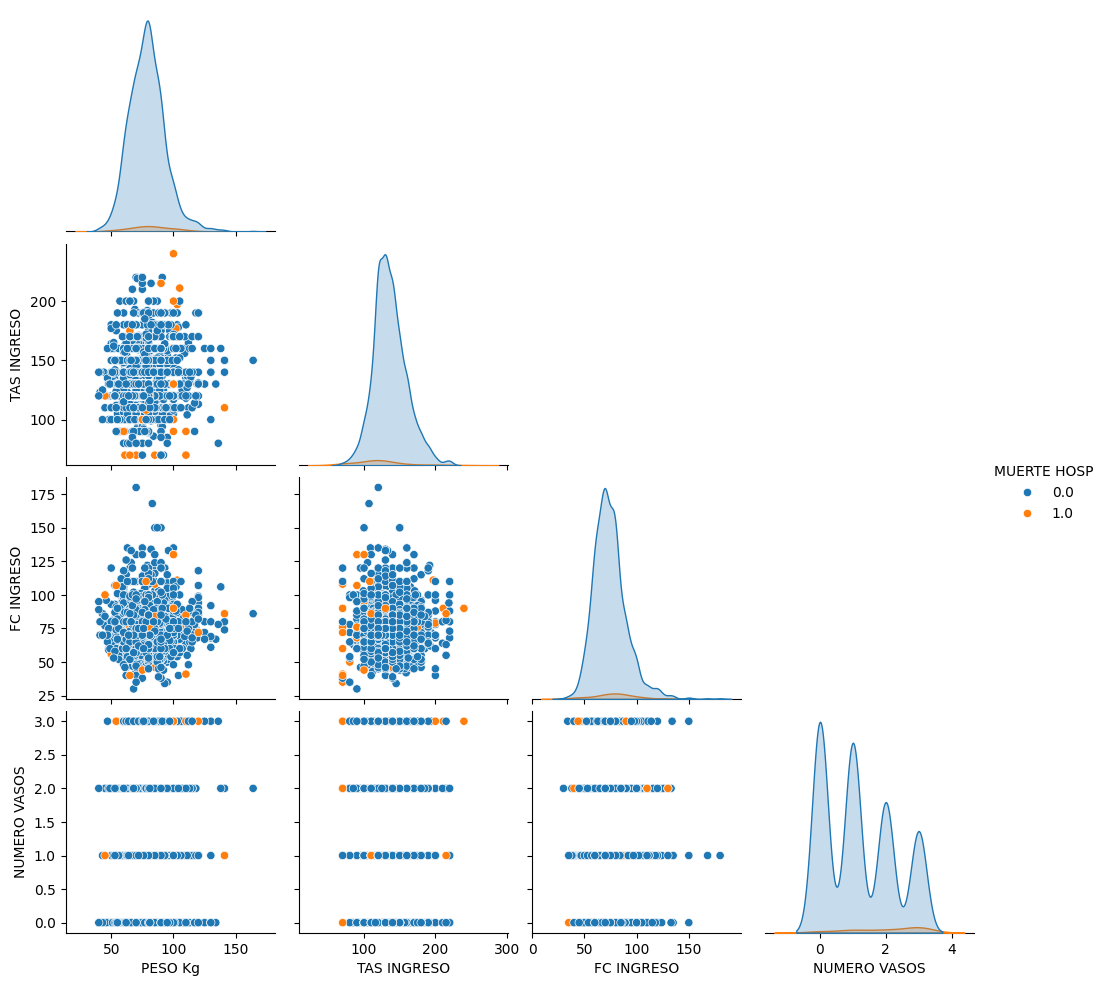

In [40]:
sns.pairplot(data=df[NUMERICAL_FEATURES + [TARGET]], corner=True, hue=TARGET)

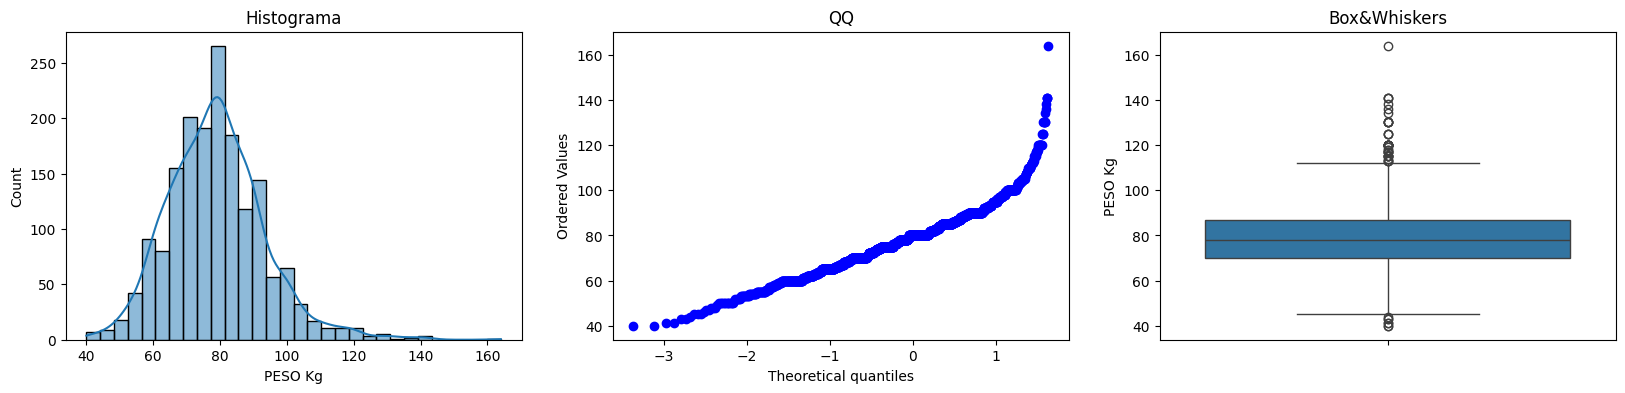

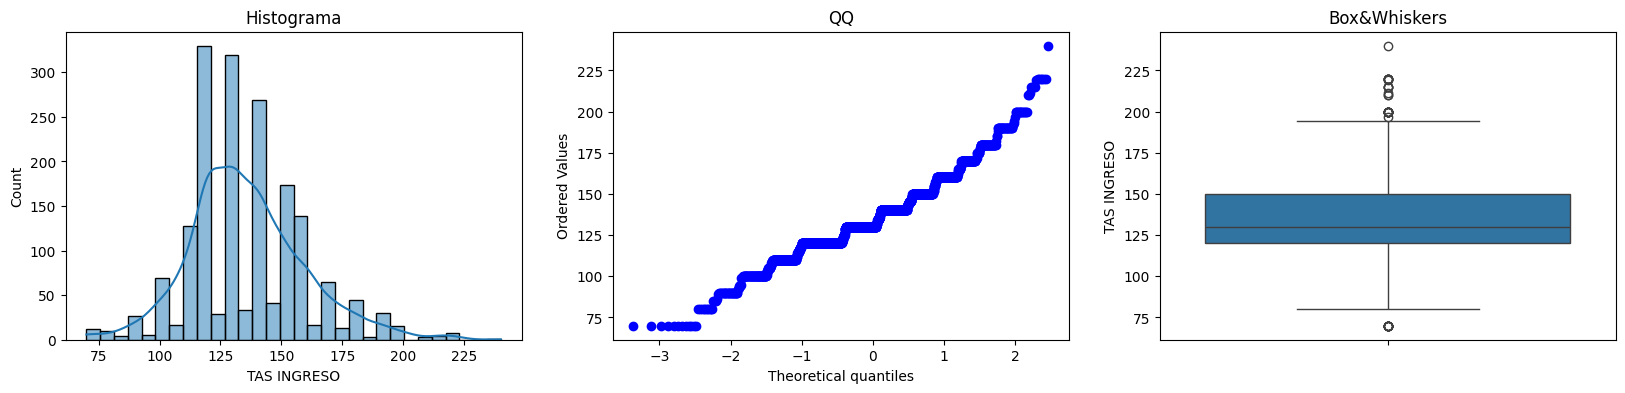

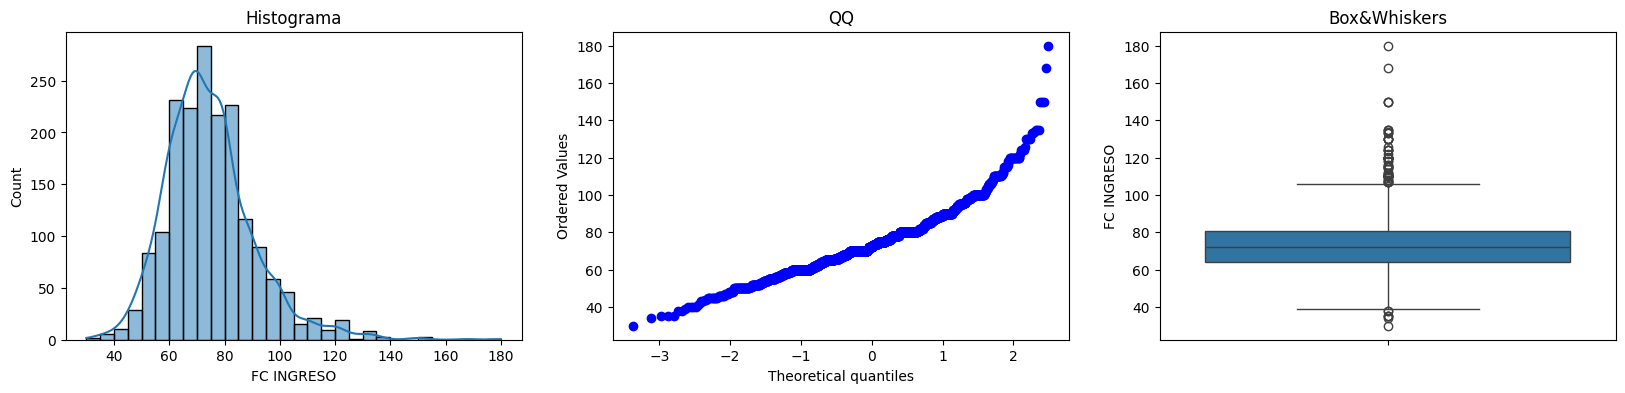

In [32]:
COMPLETE_NUMERICAL_FEATURES = ['PESO Kg', 'TAS INGRESO', 'FC INGRESO']

from utils import outlier_diagnostic_plots

for column in df[COMPLETE_NUMERICAL_FEATURES].columns:
    outlier_diagnostic_plots(df, column)

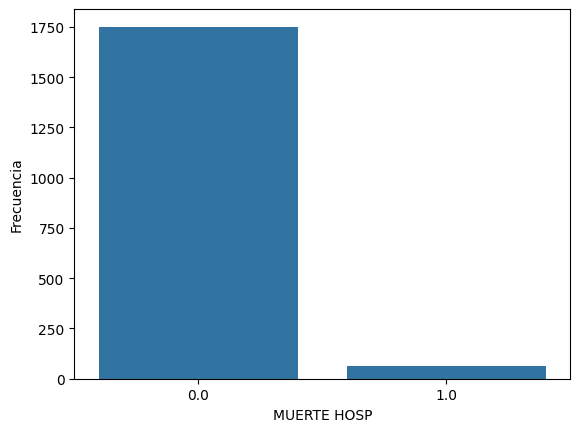

In [30]:
frecuencias_target = df[TARGET].value_counts()

df_frecuencias = frecuencias_target.reset_index()
df_frecuencias.columns = [TARGET, 'Frecuencia']

sns.barplot(x=TARGET, y='Frecuencia', data=df_frecuencias)
plt.show()

In [31]:
for index, frec in frecuencias_target.items():
    print(f"{TARGET} {index}: {round((frec * 100) / len(df), 1)}%")

MUERTE HOSP 0.0: 96.3%
MUERTE HOSP 1.0: 3.5%


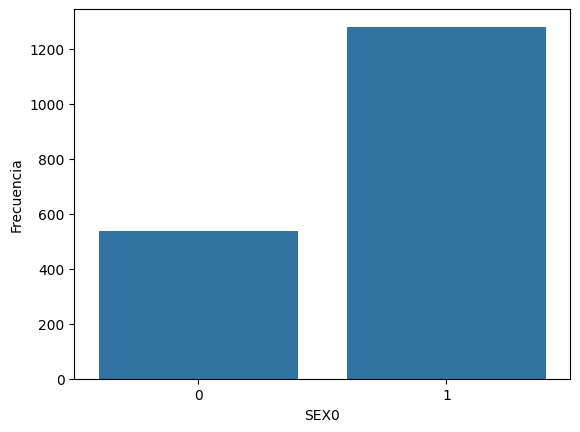

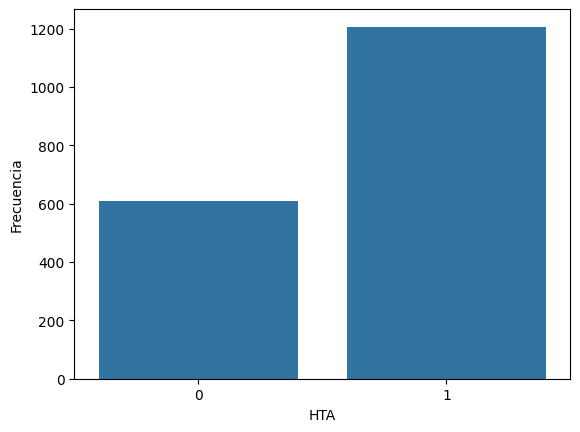

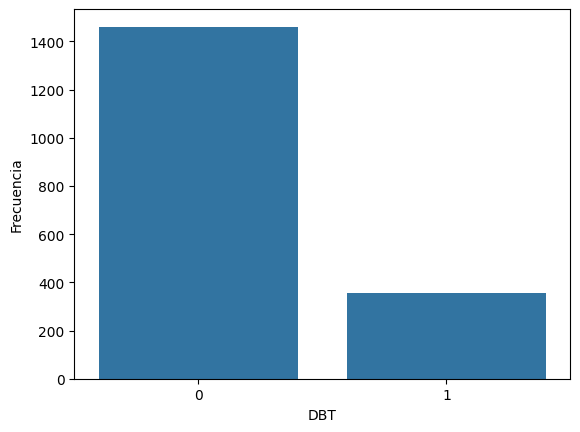

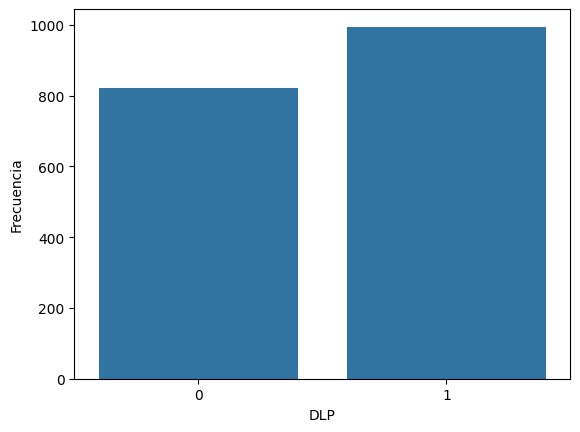

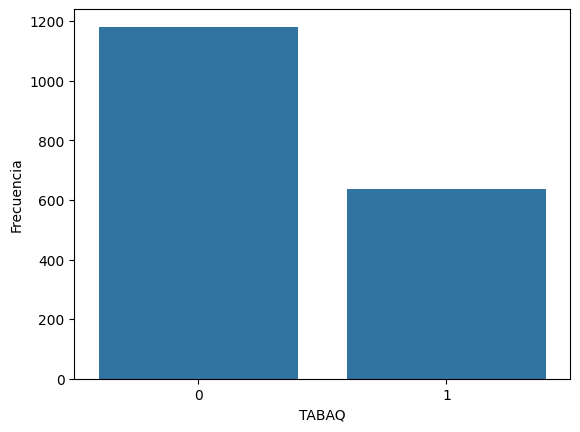

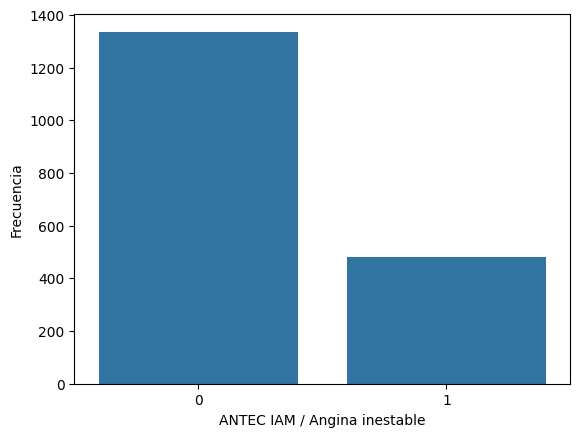

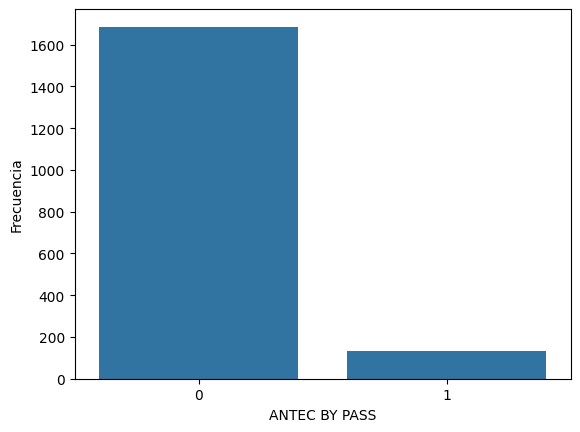

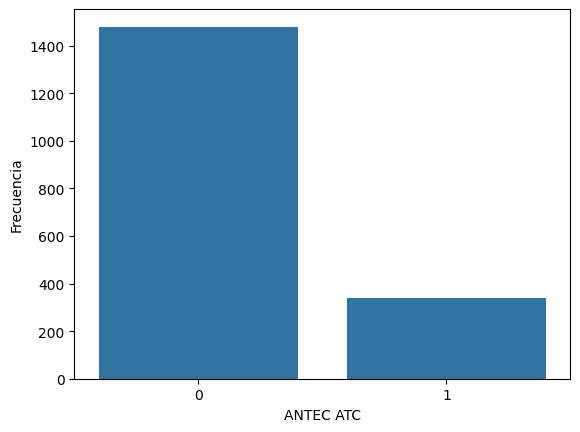

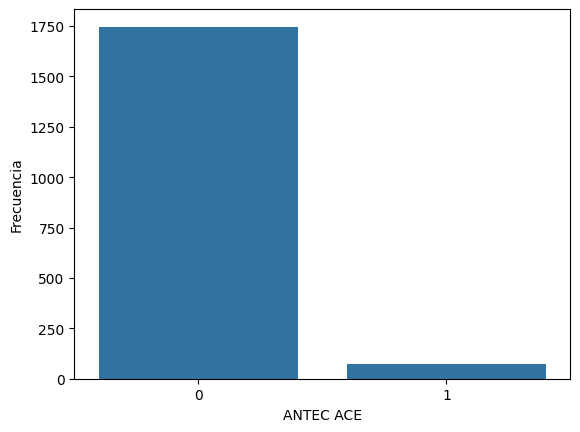

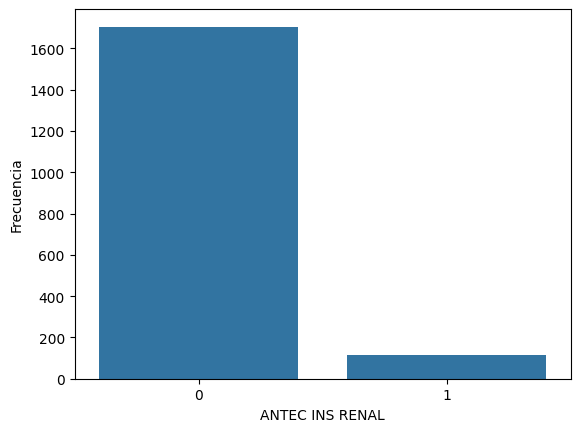

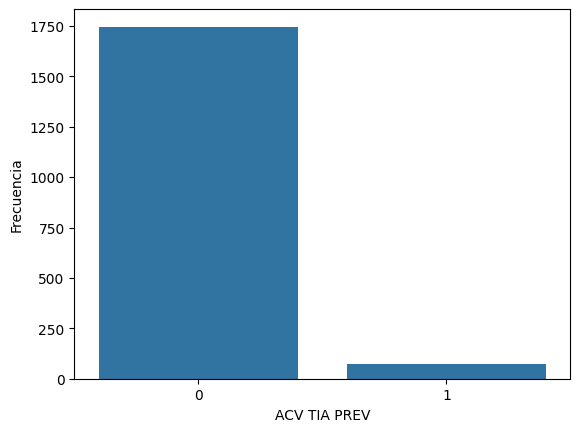

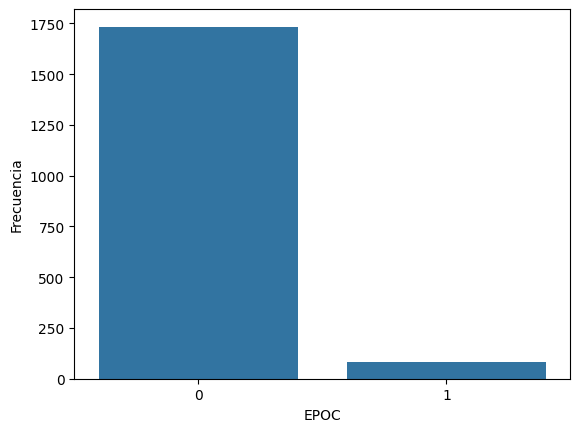

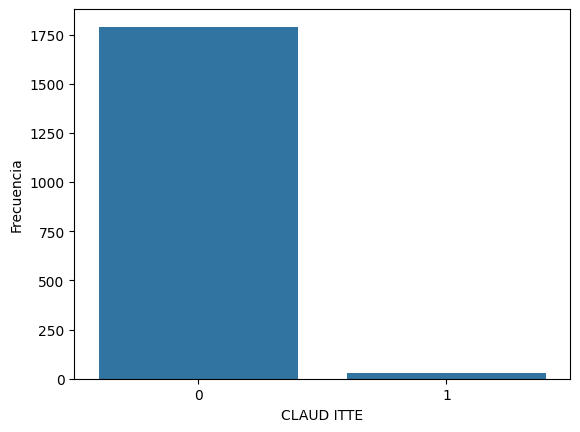

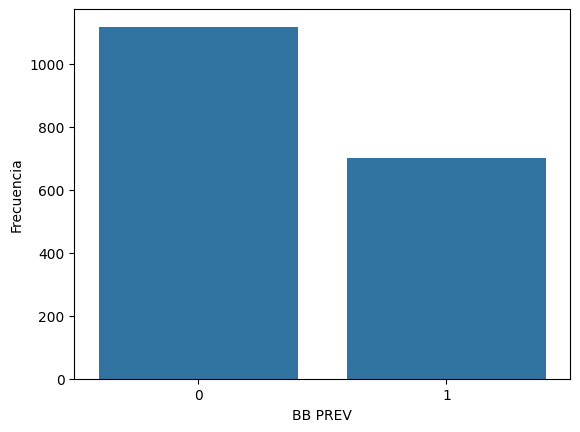

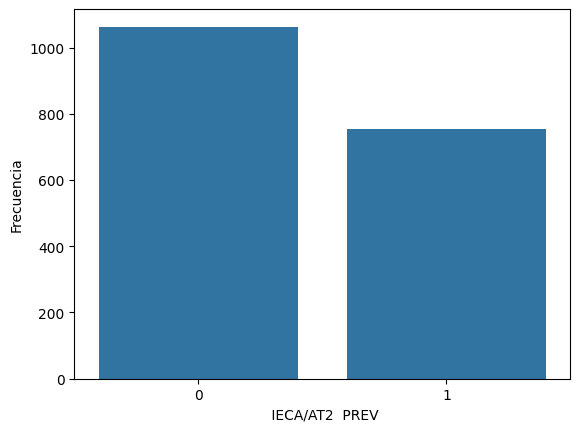

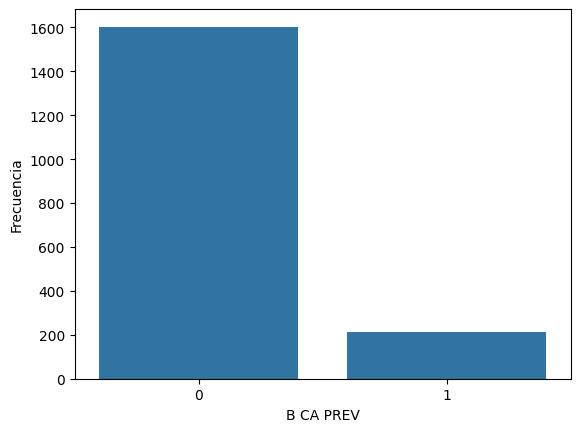

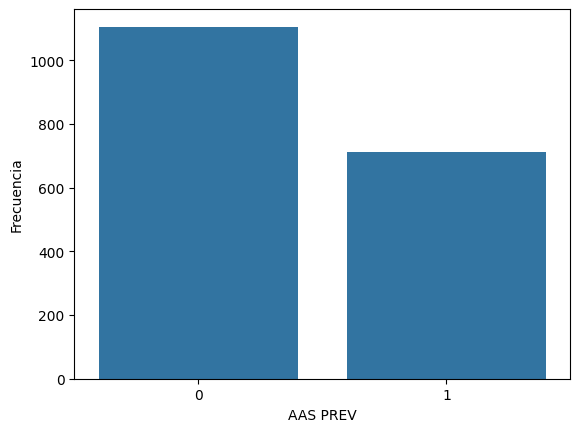

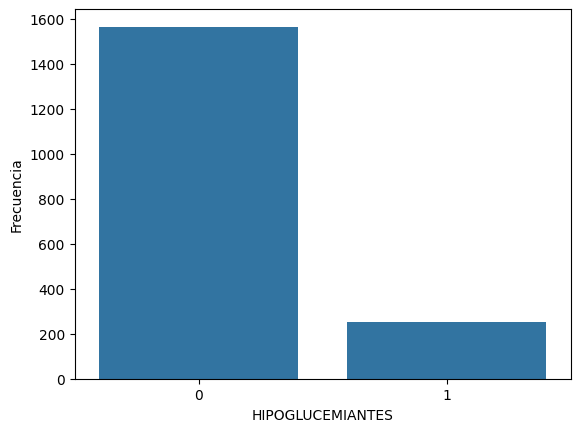

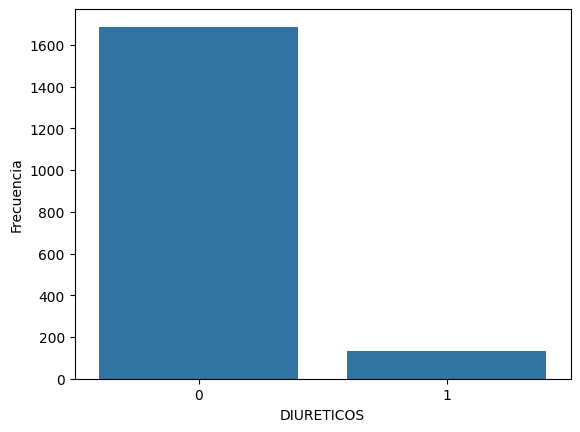

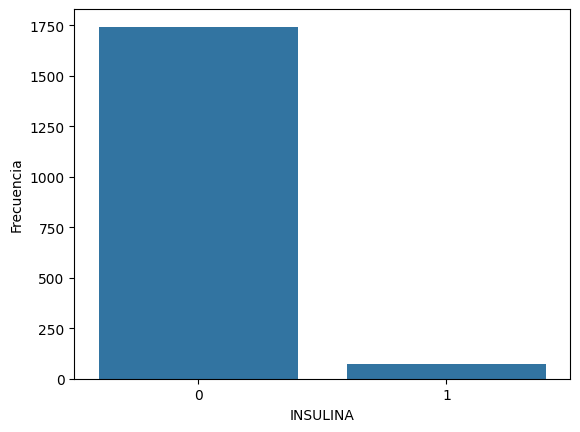

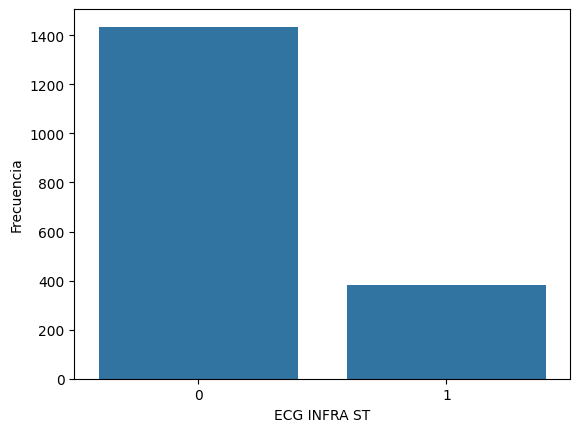

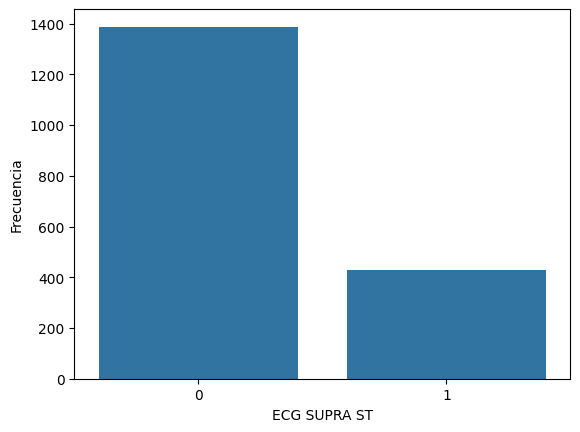

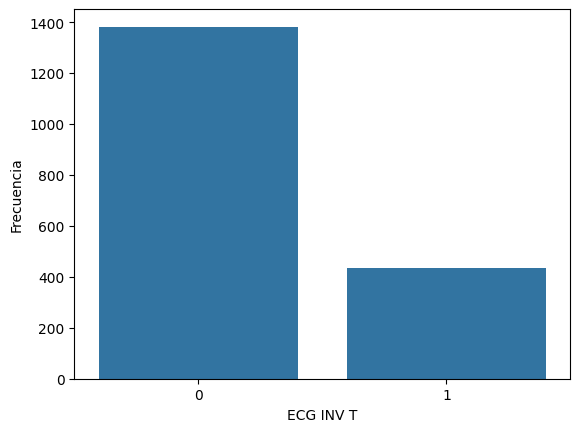

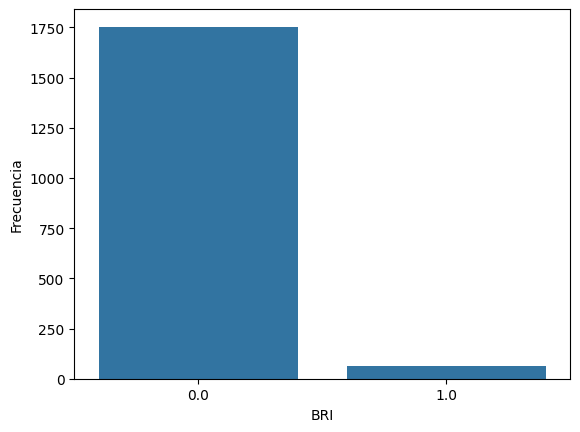

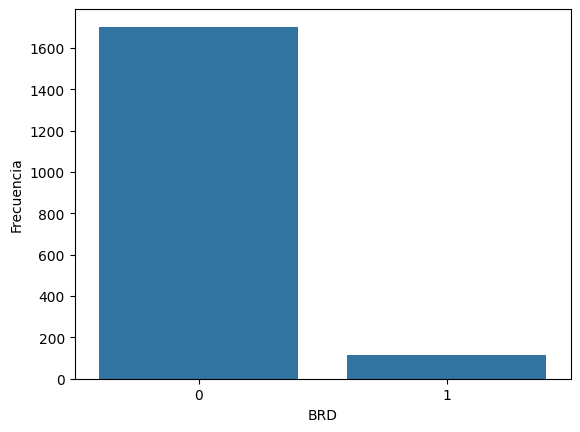

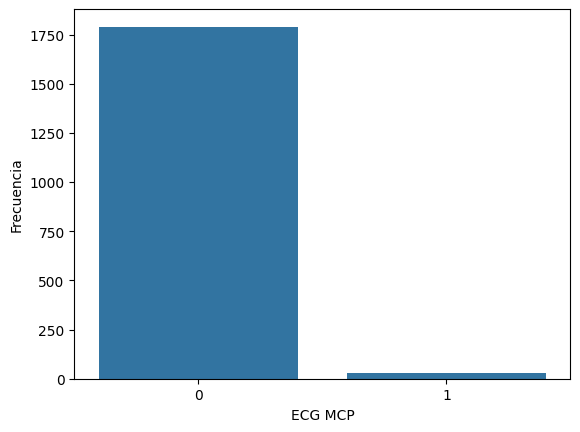

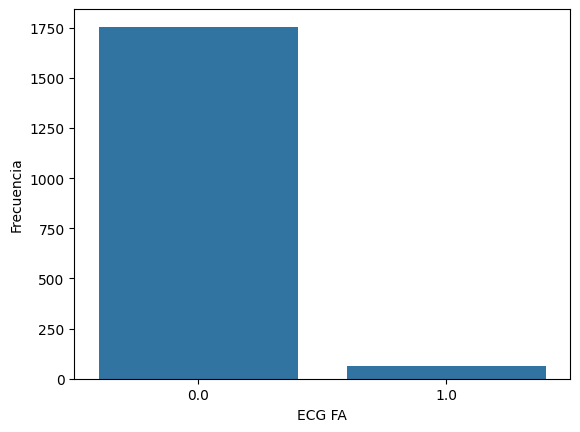

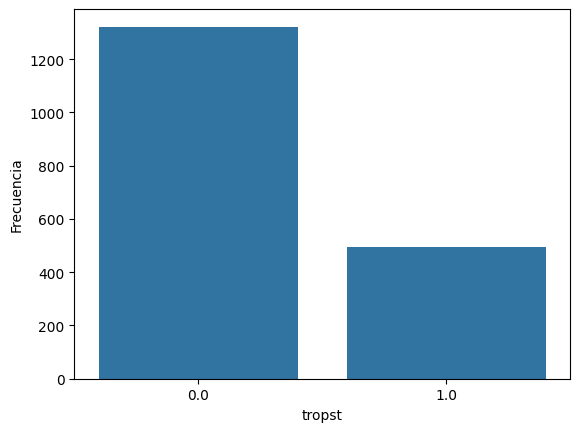

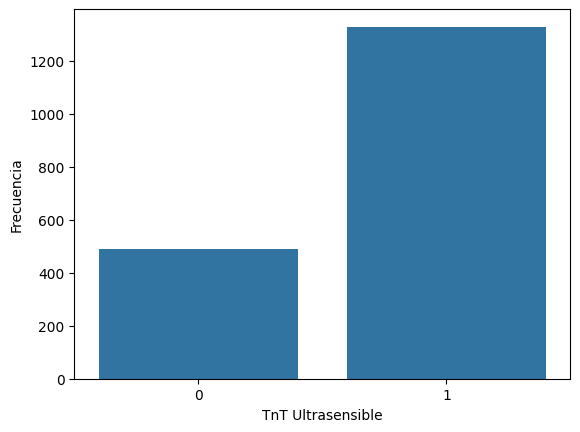

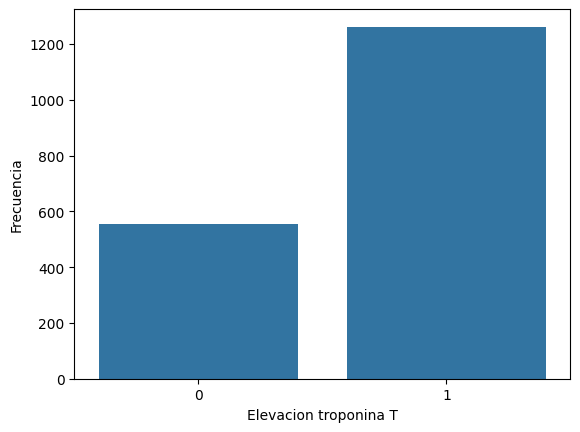

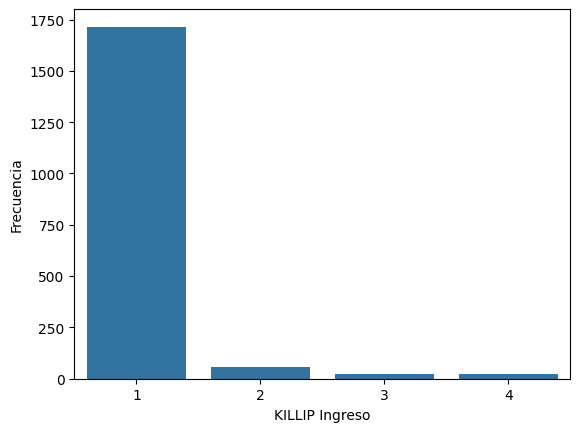

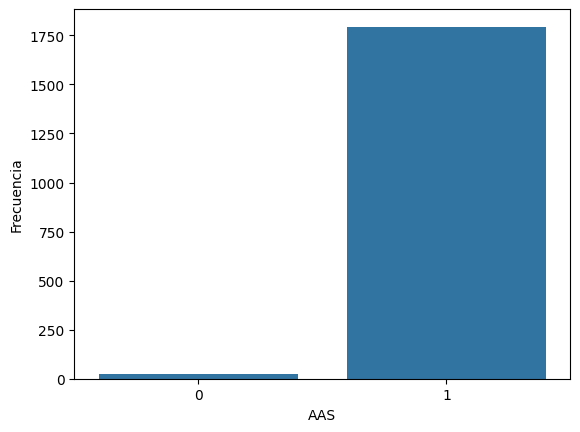

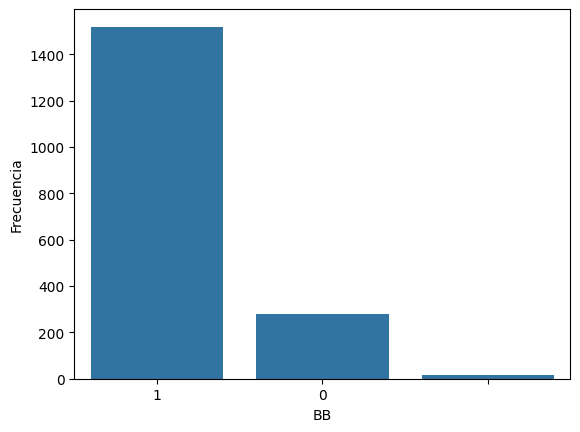

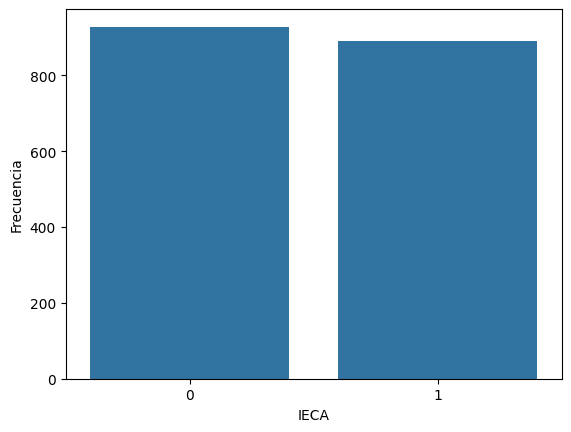

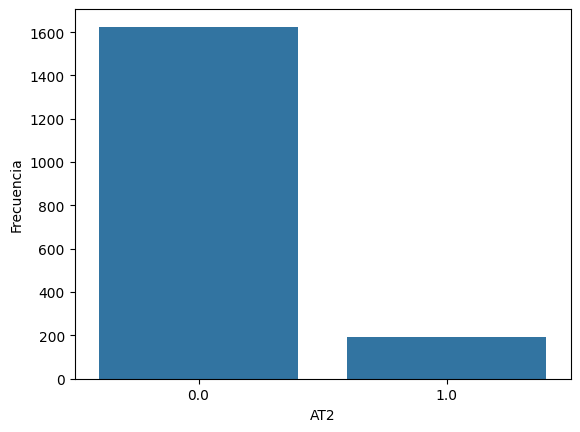

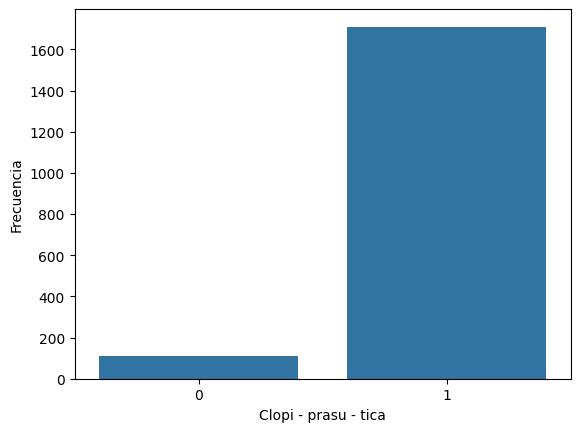

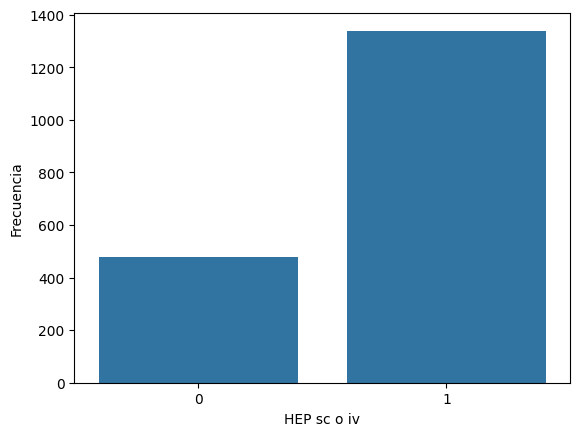

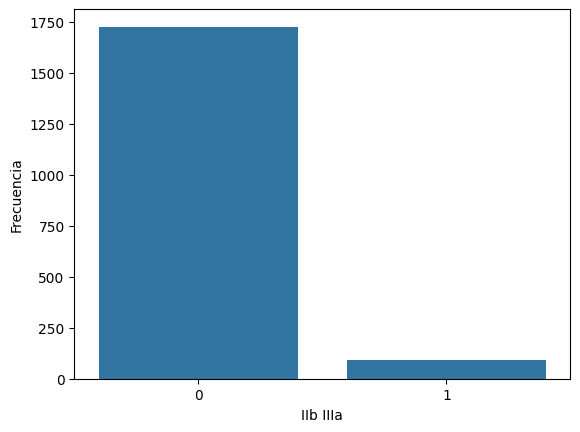

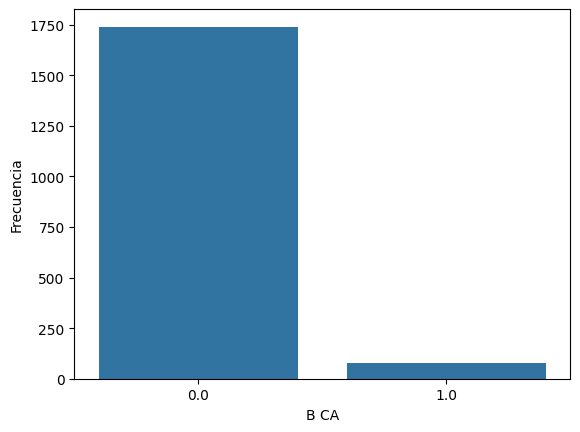

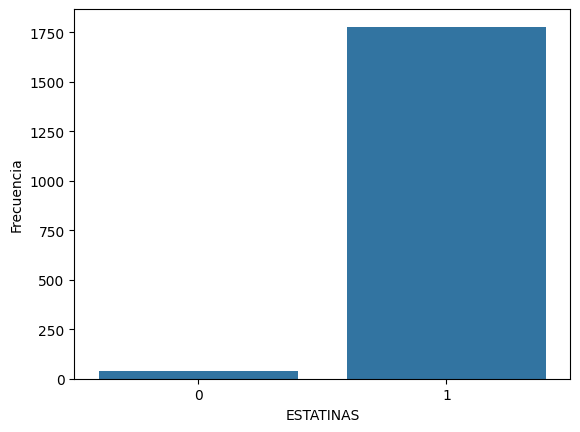

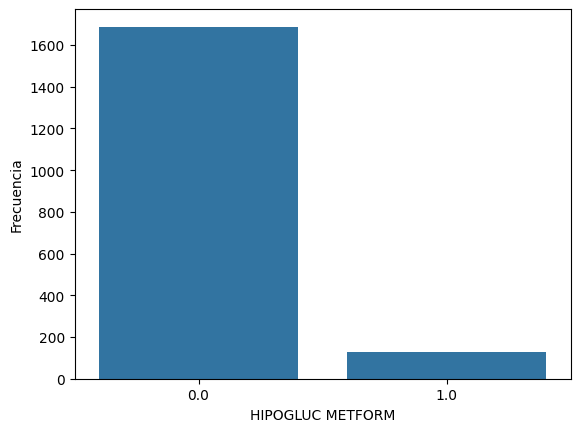

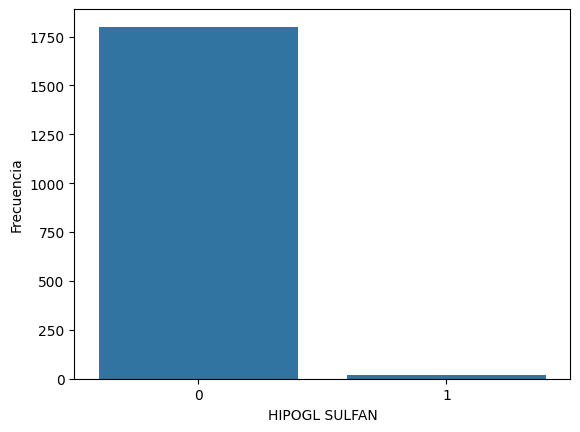

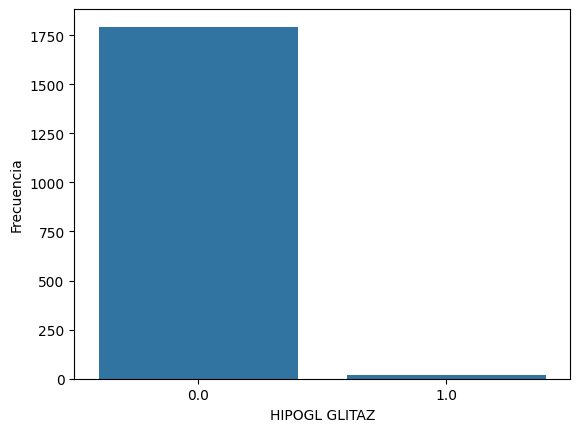

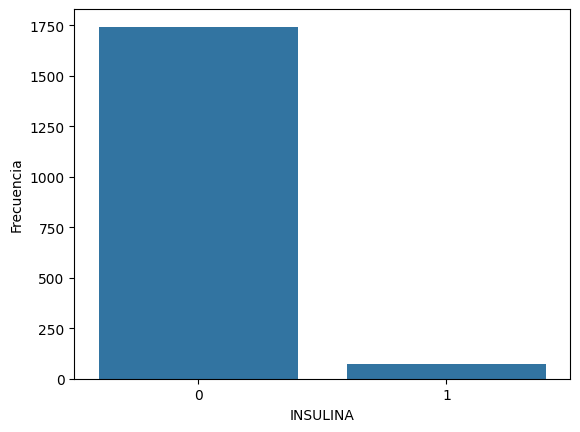

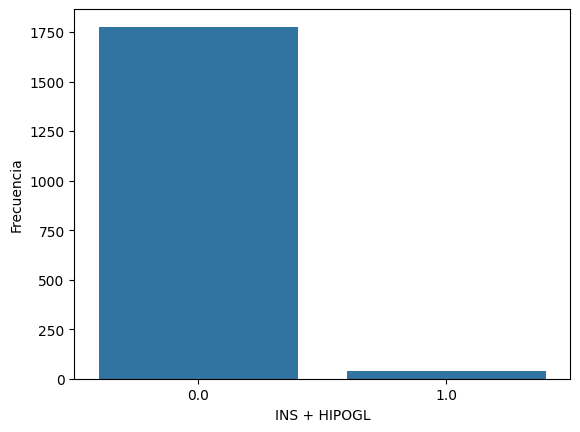

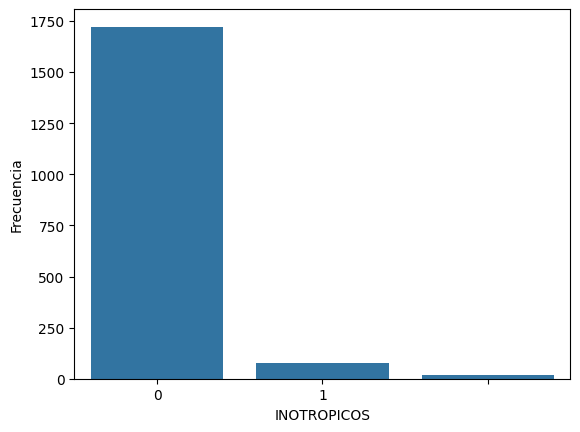

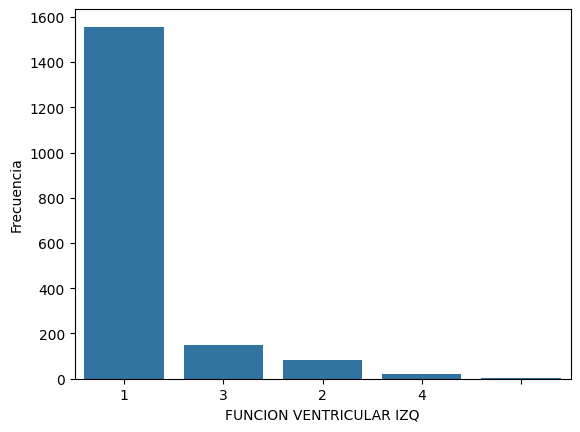

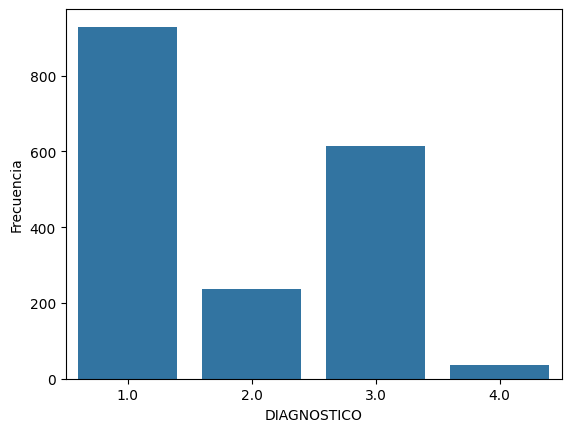

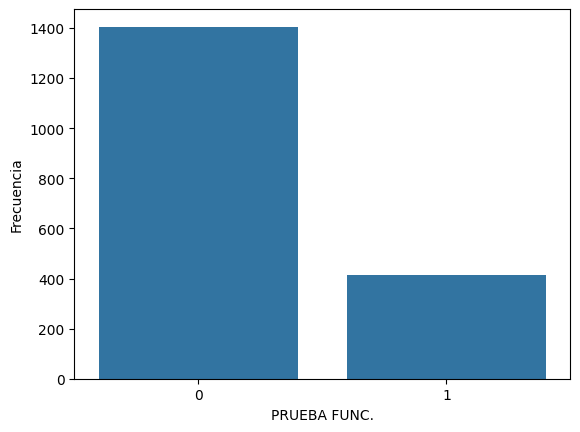

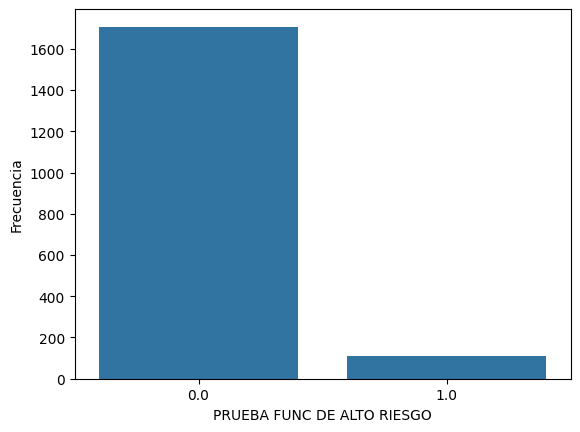

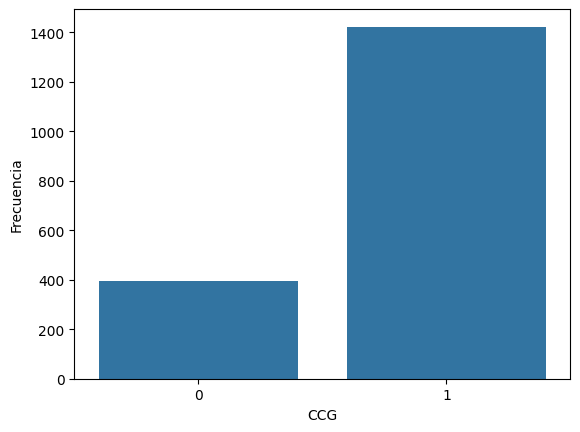

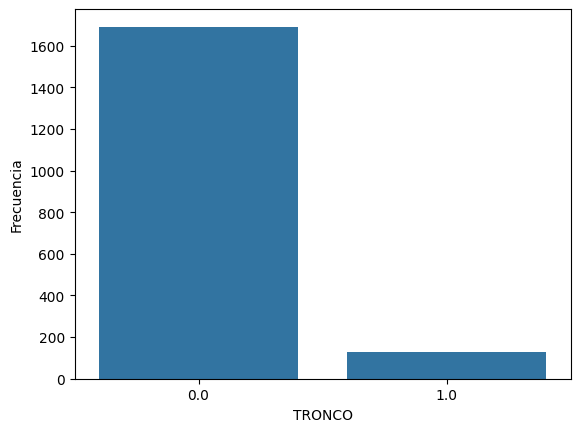

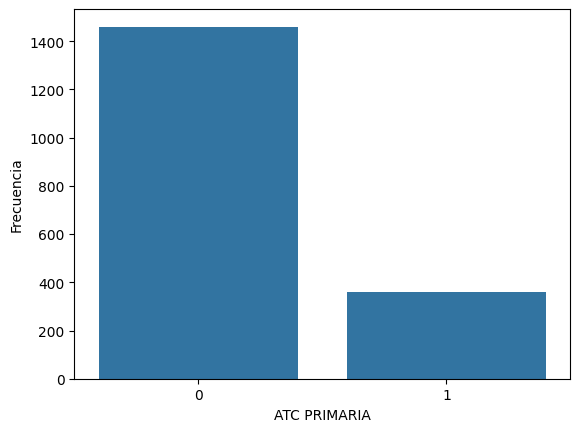

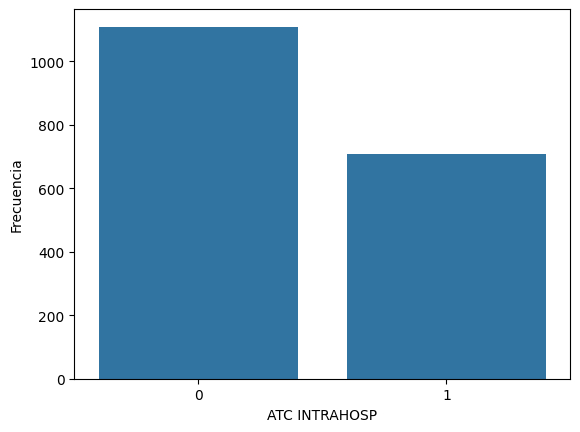

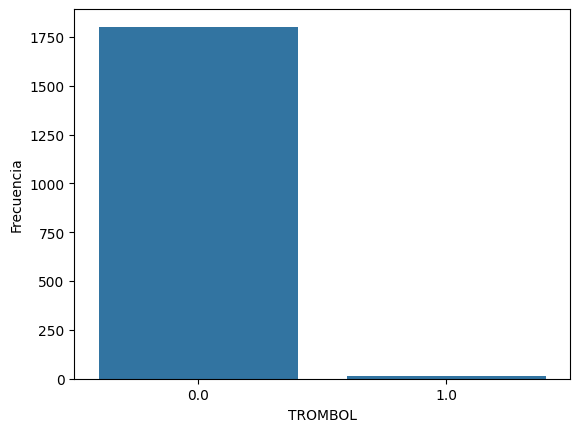

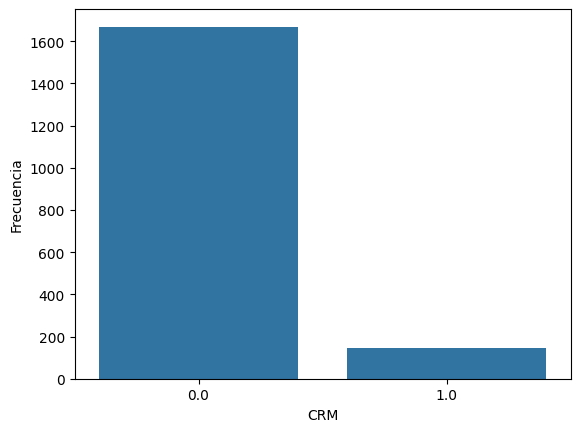

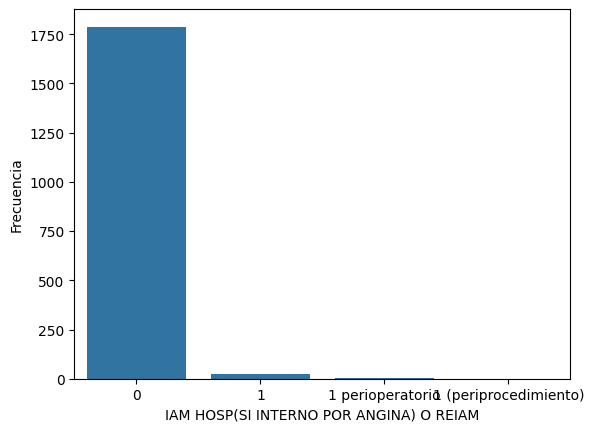

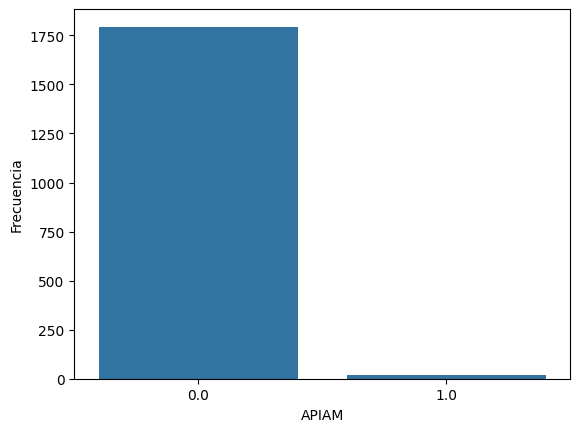

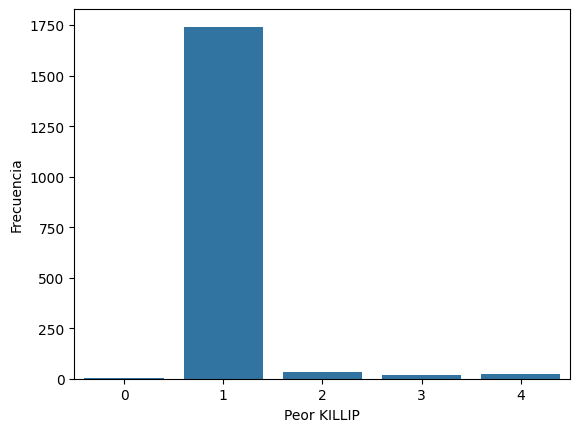

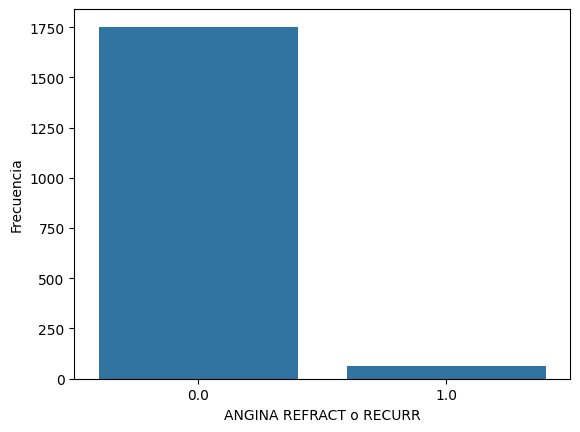

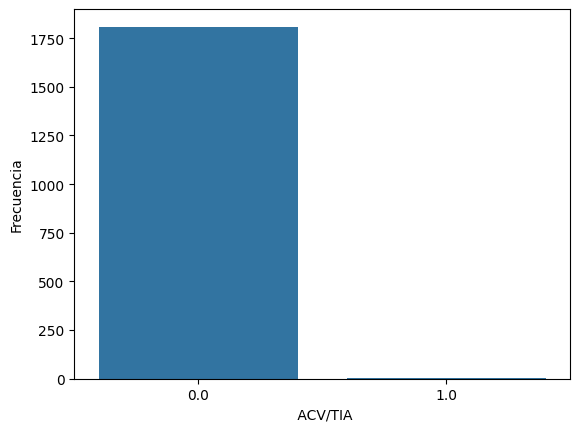

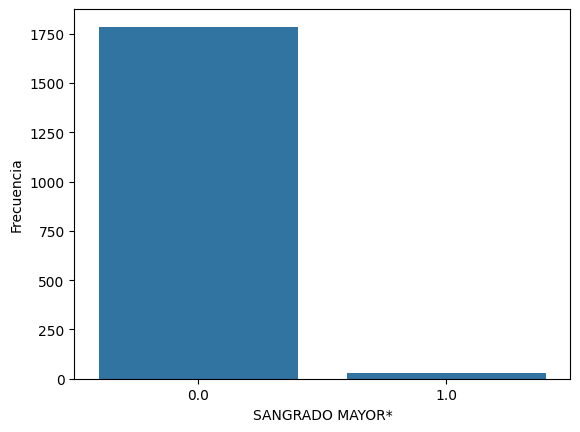

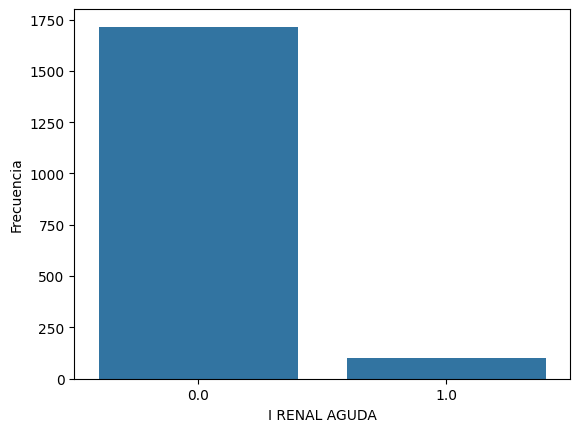

In [3]:
for column in CATEGORY_FEATURES:
    frecuencias = df[column].value_counts()
    df_frecuencias = frecuencias.reset_index()
    df_frecuencias.columns = [column, 'Frecuencia']

    sns.barplot(x=column, y='Frecuencia', data=df_frecuencias)
    plt.show()